[1280.96, 1369.88, 841.94, 1130.37, 1391.45]
1202.9199999999998 202.52382921523088
0.8893352536848262 0.0025124195043868137


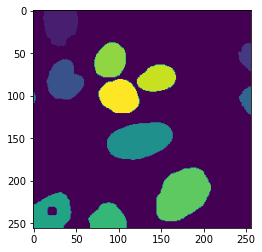

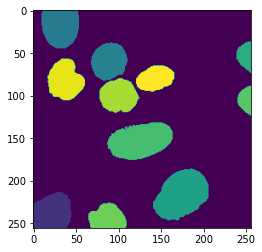

In [4]:
from DLIP.utils.visualization.inst_seg_contour import visualize_instances_map
import tifffile
from skimage.io import imread, imsave    
import numpy as np
import matplotlib.pyplot as plt
from DLIP.utils.metrics.inst_seg_metrics import remap_label, get_fast_aji_plus
import cv2 
from skimage.color import label2rgb
import os
import datetime

exp_folders = ["BBBC038_otsu_1_annotated", "BBBC038_otsu_2_annotated", "BBBC038_otsu_3_annotated", "BBBC038_otsu_4_annotated", "BBBC038_otsu_5_annotated",]

annotation_folders = [f"/home/ws/sc1357/data/pre_annotation_study/results/{folder}/train/samples/" for folder in exp_folders]
gt_folder = "/home/ws/sc1357/data/BBBC038_clean/train/labels/"

times = ["00:21:20.96","00:22:49.88","00:14:01.94","00:18:50.37","00:23:11.45"]


t_in_sec =  [(datetime.datetime.strptime(time, "%H:%M:%S.%f") - datetime.datetime(1900, 1, 1)).total_seconds() for time in times]

print(t_in_sec)
print(np.mean(t_in_sec), np.std(t_in_sec))

aji_mean_per_exp = list()
for folder in annotation_folders:
    aji = list()
    for file in os.listdir(folder):
        if not file.endswith(".png"):
            continue
        
        img = cv2.imread(os.path.join(folder, file))
        label_anno = tifffile.imread(os.path.join(folder.replace("samples", "labels"), file.replace(".png", "_label.tif"))).squeeze()
        label_gt = cv2.imread(os.path.join(gt_folder, file)).squeeze()[:,:,0]
        aji.append(get_fast_aji_plus(remap_label(label_anno), remap_label(label_gt)))
    aji_mean_per_exp.append(np.mean(aji))

print(np.mean(aji_mean_per_exp), np.std(aji_mean_per_exp))

plt.imshow(label_anno)
plt.show()

plt.imshow(label_gt)
plt.show()


# img = tifffile.imread('/home/ws/sc1357/data/datasets/2018_MoNuSeg_cropped/test/samples/TCGA-2Z-A9J9-01A-01-TS1.tif')[0:255,0:255,:]
# label = tifffile.imread('/home/ws/sc1357/data/datasets/2018_MoNuSeg_cropped/test/labels/TCGA-2Z-A9J9-01A-01-TS1.tif').squeeze()[0:255,0:255]
# # img =  imread('/home/ws/sc1357/data/datasets/2017_ISIC_Derma/test/samples/ISIC_0014077.jpg')
# # label = (imread('/home/ws/sc1357/data/datasets/2017_ISIC_Derma/test/labels/ISIC_0014077_segmentation.png').squeeze()>0).astype(np.uint8)
# pre_anno_lst = []

# PREFIX = "monuseg_sphero_2"

# img = cv2.resize(img, (256,256), interpolation=cv2.INTER_NEAREST)
# label = cv2.resize(label, (256,256), interpolation=cv2.INTER_NEAREST)

# from DLIP.pre_labeling.instance_segmentation.pre_labeler_otsu_inst import PreLabelerOtsuInst
# from DLIP.pre_labeling.instance_segmentation.pre_labeler_percentile_inst import PreLabelerPercentileInst
# from DLIP.pre_labeling.instance_segmentation.pre_labeler_unet_inst import UnetInstancePreLabeler
# from DLIP.pre_labeling.instance_segmentation.pre_labeler_cellpose import Cellpose

# pre_anno_lst.append(PreLabelerOtsuInst(do_closing=False, inverse=True))
# pre_anno_lst.append(PreLabelerPercentileInst(10, inverse=True))
# pre_anno_lst.append(Cellpose(model_type="cyto", use_gpu=True))
# pre_anno_lst.append(UnetInstancePreLabeler("/home/ws/sc1357/data/$RESULT_DIR/20220708_1427_0005_dnn_model.tar"))

# imsave(f"{PREFIX}_org.png", img)

# plt.imshow(label)
# plt.show()


# overlay = visualize_instances_map(img,label, line_thickness=2)
# imsave(f"{PREFIX}_gt.png", overlay)
# plt.imshow(overlay)
# plt.show()

# for method in pre_anno_lst:
#     pre_anno = method.predict(img, StatusBar())
#     aji = get_fast_aji_plus(remap_label(label), remap_label(pre_anno))
    
#     overlay = visualize_instances_map(img,pre_anno, line_thickness=2)
#     imsave(f"{PREFIX}_{method.__class__.__name__}_AJI_{str(aji).replace('.', 'p')}.png", overlay)
#     plt.imshow(pre_anno)
#     plt.show()


